## Analyzing DataFrame 'Sleep cycle and productivity'

In [ ]:
'''Hipótese que tentaremos responder:

Qual real impacto da qualidade do sono com sua produtividade e felicidade?
Pessoas mais tristes produzem menos?
A infelicidade também está associada a dormir mal?
Quantidade de horas dormidas impacta a qualidade do sono?
'''

### Importações necessárias

In [107]:
import pandas as pd  # Biblioteca para manipulação de dados em DataFrames (tabelas)
import numpy as np  # Biblioteca para operações numéricas e cálculos matemáticos
import seaborn as sns  # Biblioteca para visualização de dados baseada no Matplotlib
import matplotlib.pyplot as plt  # Biblioteca principal para criação de gráficos

### Visualizando e pré processando os dados

In [9]:
base = pd.read_csv('datasets/sleep_cycle_productivity.csv') 

In [13]:
base.columns.tolist()

['Date',
 'Person_ID',
 'Age',
 'Gender',
 'Sleep Start Time',
 'Sleep End Time',
 'Total Sleep Hours',
 'Sleep Quality',
 'Exercise (mins/day)',
 'Caffeine Intake (mg)',
 'Screen Time Before Bed (mins)',
 'Work Hours (hrs/day)',
 'Productivity Score',
 'Mood Score',
 'Stress Level']

In [15]:
base.sample(4)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
3042,2024-03-09,7874,59,Female,21.23,3.92,6.69,4,82,84,125,8.897001,1,4,6
1529,2024-07-21,1716,42,Male,21.73,6.29,8.55,5,64,79,91,8.719385,3,2,6
1291,2024-11-15,5307,30,Female,22.92,8.02,9.11,8,86,77,67,6.125428,10,6,6
264,2024-11-17,1517,22,Female,20.07,1.52,5.45,4,40,218,176,7.180899,3,10,2


In [18]:
base.shape

(5000, 15)

In [30]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5000 non-null   datetime64[ns]
 1   Age                            5000 non-null   int64         
 2   Gender                         5000 non-null   category      
 3   Sleep Start Time               5000 non-null   float64       
 4   Sleep End Time                 5000 non-null   float64       
 5   Total Sleep Hours              5000 non-null   float64       
 6   Sleep Quality                  5000 non-null   int64         
 7   Exercise (mins/day)            5000 non-null   int64         
 8   Caffeine Intake (mg)           5000 non-null   int64         
 9   Screen Time Before Bed (mins)  5000 non-null   int64         
 10  Work Hours (hrs/day)           5000 non-null   float64       
 11  Productivity Scor

In [ ]:
base = base.drop('Person_ID', axis = 1) # removendo coluna 'Person_ID'

In [26]:
base['Date'] = pd.to_datetime(base['Date']) # alterando tipo da coluna para data

In [34]:
base['Gender'] = base['Gender'].astype('category')

In [36]:
# Decidi alterar o nome das colunas para PT-Br, para tornar-lo inclusivo

In [37]:
base.columns

Index(['Date', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)',
       'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score',
       'Stress Level'],
      dtype='object')

In [53]:
base.columns = ['data','idade','genero','horario_dormiu','horario_acordou',
'total_horas_dormidas','qualidade_sono', 'exercicios', 'cafeina_ingerida',
'tempo_tela_antes_dormir', 'horas_trabalhadas', 'produtividade_score',
'humor_score', 'nivel_estresse']

### EDA - análise exploratória de dados

In [143]:
base.sample(20)

,idade,horario_dormiu,horario_acordou,total_horas_dormidas,qualidade_sono,exercicios,cafeina_ingerida,tempo_tela_antes_dormir,horas_trabalhadas,produtividade_score,humor_score,nivel_estresse
1886,20,23.55,4.95,5.40,5,23,43,113,8.125135,7,6,8
1405,20,23.02,8.34,9.32,4,37,69,51,5.318182,10,4,10
4922,18,20.27,3.69,7.42,2,36,161,172,10.390959,5,3,2
1755,36,21.73,4.59,6.86,2,0,212,130,4.269841,7,1,9
1879,18,20.18,3.85,7.67,5,81,251,160,4.176750,7,8,5
4796,26,23.43,8.71,9.28,3,87,239,68,10.616075,6,6,7
2308,37,22.42,6.63,8.21,8,56,9,104,9.226042,8,7,2
4572,53,20.32,2.78,6.47,4,66,220,166,9.658706,7,1,5
2637,21,22.62,3.56,4.94,2,50,185,63,11.136849,1,3,6
1092,20,23.58,4.72,5.13,9,50,144,144,11.164161,6,4,3


In [57]:
base.describe()

,data,idade,horario_dormiu,horario_acordou,total_horas_dormidas,qualidade_sono,exercicios,cafeina_ingerida,tempo_tela_antes_dormir,horas_trabalhadas,produtividade_score,humor_score,nivel_estresse
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2024-07-03 23:53:05.280000,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
min,2024-01-01 00:00:00,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,2024-04-06 00:00:00,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,2024-07-05 00:00:00,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,2024-10-05 00:00:00,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,2024-12-31 00:00:00,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000
std,NaN,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419


In [78]:
def analise_relacao(correlacao):
    print(f'A relação em número:{correlacao:.3f}')
    if correlacao >= 0.4:
        print('Possuem relação positiva forte')
    elif correlacao <= -0.4:
        print('Possuem relação negativa forte')
    else:
        print('Possuem pouca ou nenhuma relação')
    

In [79]:
# analisando relação de idade com horas dormidas
idade_horasDormidas_relacao = base['idade'].corr(base['total_horas_dormidas'])
analise_relacao(idade_horasDormidas_relacao)  

A relação em número:-0.011
Possuem pouca ou nenhuma relação


In [80]:
# analisando relação de horas dormidas e produtividade
horasDormidas_produtividade_relacao = base['total_horas_dormidas'].corr(base['produtividade_score'])
analise_relacao(horasDormidas_produtividade_relacao)

A relação em número:0.019
Possuem pouca ou nenhuma relação


In [81]:
# analisando relação de horas dormidas com ingestão de cafeina
horasDormidas_ingestaoCafeina_relacao = base['total_horas_dormidas'].corr(base['cafeina_ingerida'])
analise_relacao(horasDormidas_ingestaoCafeina_relacao)

A relação em número:0.020
Possuem pouca ou nenhuma relação


In [82]:
# analisando relação de horas dormidas com qualidade do sono
horasDormidas_qualidadeSono_relacao = base['total_horas_dormidas'].corr(base['qualidade_sono'])
analise_relacao(horasDormidas_qualidadeSono_relacao)

A relação em número:0.002
Possuem pouca ou nenhuma relação


In [93]:
base_genero = base.drop('genero', axis=1, inplace=True)
base_data = base.drop('data', axis=1, inplace=True)

In [104]:
base.dtypes

idade                        int64
horario_dormiu             float64
horario_acordou            float64
total_horas_dormidas       float64
qualidade_sono               int64
exercicios                   int64
cafeina_ingerida             int64
tempo_tela_antes_dormir      int64
horas_trabalhadas          float64
produtividade_score          int64
humor_score                  int64
nivel_estresse               int64
dtype: object

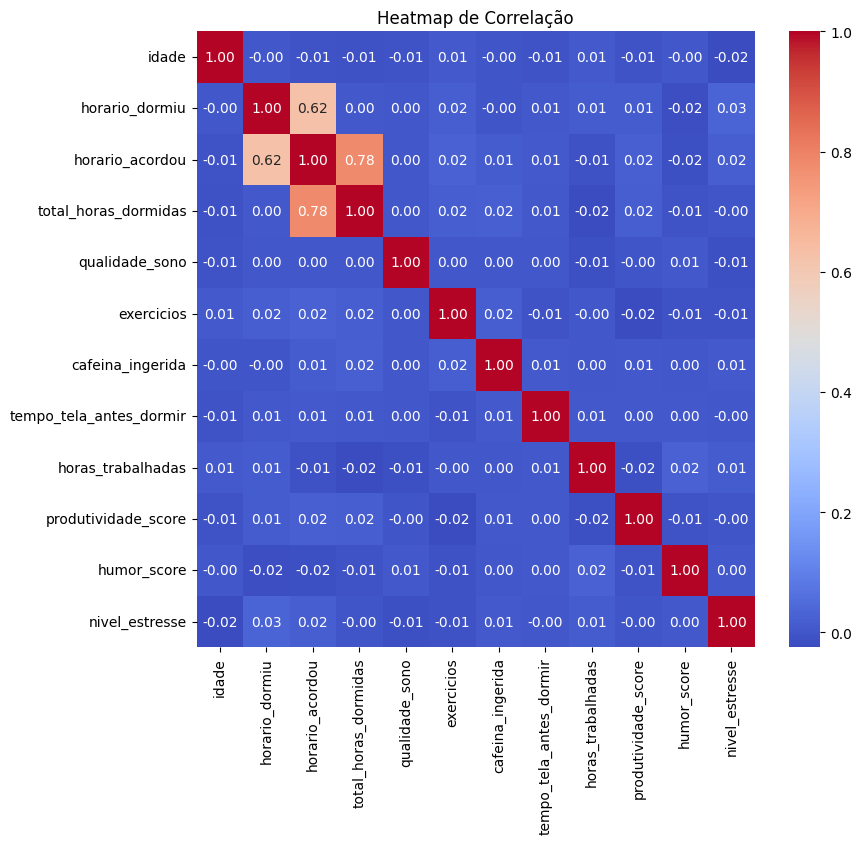

In [128]:
# Analisando o relacionamento de todas variaveis

plt.figure(figsize=(9, 8))
sns.heatmap(base.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Heatmap de Correlação")
plt.show()


In [146]:
base.corr()

,idade,horario_dormiu,horario_acordou,total_horas_dormidas,qualidade_sono,exercicios,cafeina_ingerida,tempo_tela_antes_dormir,horas_trabalhadas,produtividade_score,humor_score,nivel_estresse
idade,1.000000,-0.000317,-0.008909,-0.011092,-0.006160,0.009525,-0.001473,-0.008662,0.007713,-0.008369,-0.000295,-0.024990
horario_dormiu,-0.000317,1.000000,0.624997,0.004382,0.001317,0.015982,-0.003353,0.005332,0.013158,0.011774,-0.017617,0.031956
horario_acordou,-0.008909,0.624997,1.000000,0.783354,0.002731,0.023624,0.013747,0.007771,-0.009755,0.022031,-0.016487,0.016709
total_horas_dormidas,-0.011092,0.004382,0.783354,1.000000,0.002390,0.017514,0.020274,0.005732,-0.022910,0.018885,-0.007092,-0.004082
qualidade_sono,-0.006160,0.001317,0.002731,0.002390,1.000000,0.000570,0.000669,0.002062,-0.014777,-0.001155,0.005812,-0.014364
exercicios,0.009525,0.015982,0.023624,0.017514,0.000570,1.000000,0.015268,-0.005794,-0.000429,-0.024903,-0.012675,-0.012240
cafeina_ingerida,-0.001473,-0.003353,0.013747,0.020274,0.000669,0.015268,1.000000,0.009154,0.000893,0.005058,0.002703,0.009030
tempo_tela_antes_dormir,-0.008662,0.005332,0.007771,0.005732,0.002062,-0.005794,0.009154,1.000000,0.005476,0.003703,0.003839,-0.000814
horas_trabalhadas,0.007713,0.013158,-0.009755,-0.022910,-0.014777,-0.000429,0.000893,0.005476,1.000000,-0.016263,0.023793,0.013442
produtividade_score,-0.008369,0.011774,0.022031,0.018885,-0.001155,-0.024903,0.005058,0.003703,-0.016263,1.000000,-0.006673,-0.001088


In [114]:
horarioDormiu_horarioAcordou_relacao = base['horario_acordou'].corr(base['horario_dormiu'])
analise_relacao(horarioDormiu_horarioAcordou_relacao)

A relação em número:0.625
Possuem relação positiva forte


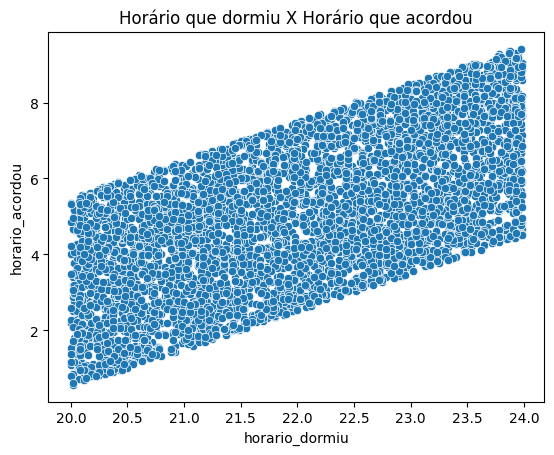

In [129]:
plt.title('Horário que dormiu X Horário que acordou')
fig = sns.scatterplot(x=base['horario_dormiu'], y=base['horario_acordou'])
plt.show(fig)

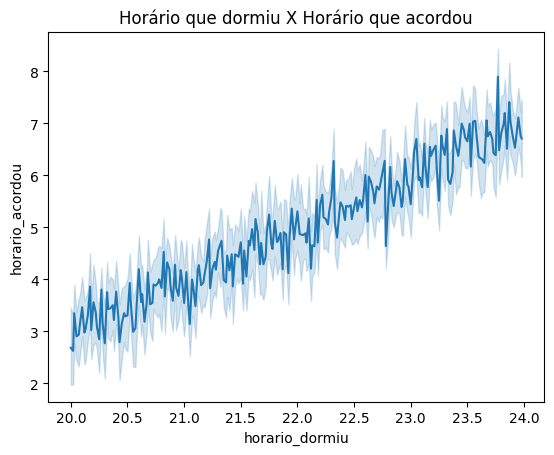

In [130]:
plt.title('Horário que dormiu X Horário que acordou')
fig2 = sns.lineplot(x=base['horario_dormiu'], y=base['horario_acordou'])
plt.show(fig2)

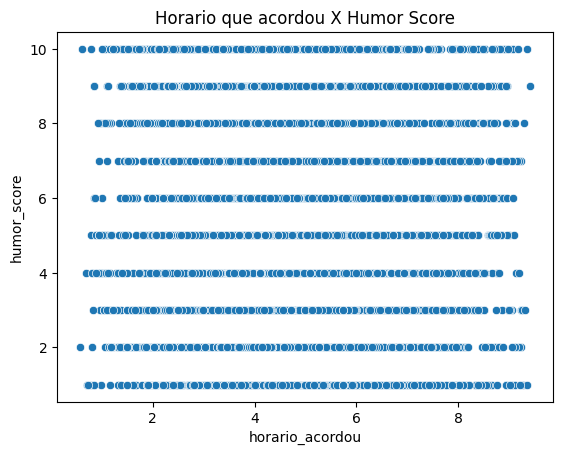

In [145]:
# Horario que acordou X humor
plt.title('Horario que acordou X Humor Score')
fig3 = sns.scatterplot(x=base['horario_acordou'], y=base['humor_score'])
plt.show(fig3)

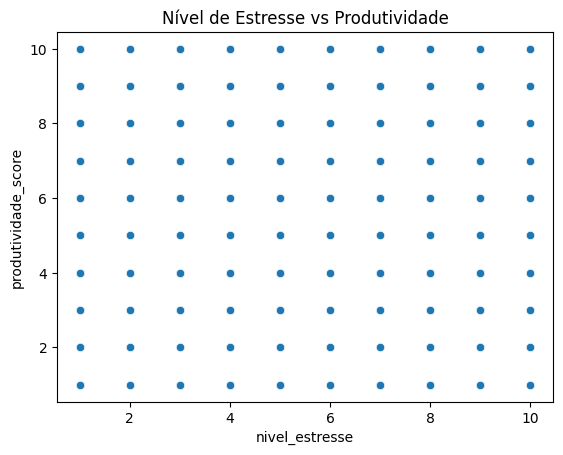

In [147]:
sns.scatterplot(x=base['nivel_estresse'], y=base['produtividade_score'])
plt.title("Nível de Estresse vs Produtividade")
plt.show()


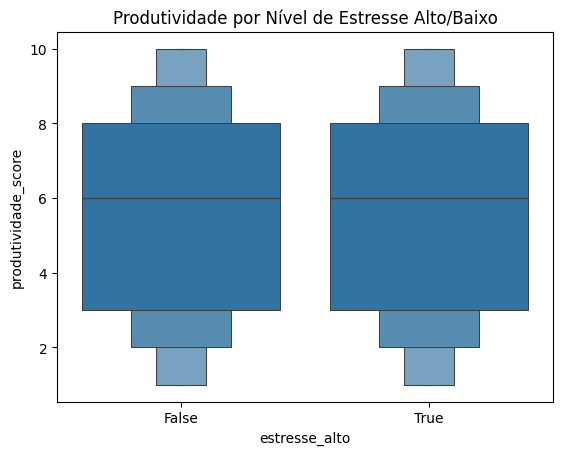

In [151]:
base['estresse_alto'] = base['nivel_estresse'] >= 7
sns.boxenplot(x=base['estresse_alto'], y=base['produtividade_score'])
plt.title("Produtividade por Nível de Estresse Alto/Baixo")
plt.show()


### Conclusões&insigts